<a href="https://colab.research.google.com/github/HansakaDilshanJayawardana/MLAssignment/blob/model%2FCNN-Model/Jupyter%20Notebooks/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN using the Fashion MNIST Dataset**

In [1]:
# To store and process in a dataframe
import pandas as pd
# Advancec ploting
import seaborn as sns
# For ploting graphs
import matplotlib.pyplot as plt
import tensorflow as tf
# For numerical analysis
import numpy as np
from numpy import argmax, array_equal
# Layers
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D, Dropout, Flatten, MaxPooling2D
# Train test split
from sklearn.model_selection import train_test_split
# Stop the training when there is no improvement in the loss for three consecutive epochs
from keras.callbacks import EarlyStopping
# Model performance metrics
from sklearn.metrics import classification_report
# Utility functions
from tensorflow.keras.utils import to_categorical
# Sequential model
from tensorflow.keras.models import Sequential, Model
from imgaug import augmenters
from random import randint

#### **Step 1: Load the Dataset**
##### This step is loading the Fashion MNIST dataset from Kaggle. First, it removes any existing Kaggle configuration files and directories from the system. Then, it installs the Kaggle library using pip. Next, it uploads the Kaggle API credentials file (kaggle.json) which allows access to the Kaggle dataset. The credentials file is saved in the .kaggle directory in the user's home folder and its permission is changed. The Fashion MNIST dataset is downloaded from Kaggle using the kaggle datasets download command. Finally, the code unzips the downloaded files and loads the train and test datasets using pandas read_csv function

In [2]:
# Remove any file and Delete .kaggle directory
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
# Install Kaggle
!pip install -q kaggle

In [4]:
# To upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hansakajayawardana","key":"44881d9d76ac3feedc68f490d49dc0a3"}'}

In [5]:
# To save this file into a directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# To change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
# Download the Fashion MNIST dataset from Kaggle
!kaggle datasets download -d zalando-research/fashionmnist

100% 68.8M/68.8M [00:00<00:00, 251MB/s]
100% 68.8M/68.8M [00:00<00:00, 237MB/s]


In [11]:
# Extract the files in the zip file
!unzip -n 'fashionmnist.zip'

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [12]:
# Load Data 
train = pd.read_csv('fashion-mnist_train.csv', sep=',')
test = pd.read_csv('fashion-mnist_test.csv', sep=',')

###### **Data Visulization After Step 1**

In [13]:
# Train Head
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Test Head
test.head(5) 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Print the number of rows and columns in the train and test datasets
print("Fashion MNIST train -  rows:",train.shape[0]," columns:", train.shape[1])
print("Fashion MNIST test -  rows:",test.shape[0]," columns:", test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [16]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Get Classes Distribution Method Implementation
def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

# Calculate the distribution of the classes in the training dataset
get_classes_distribution(train)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


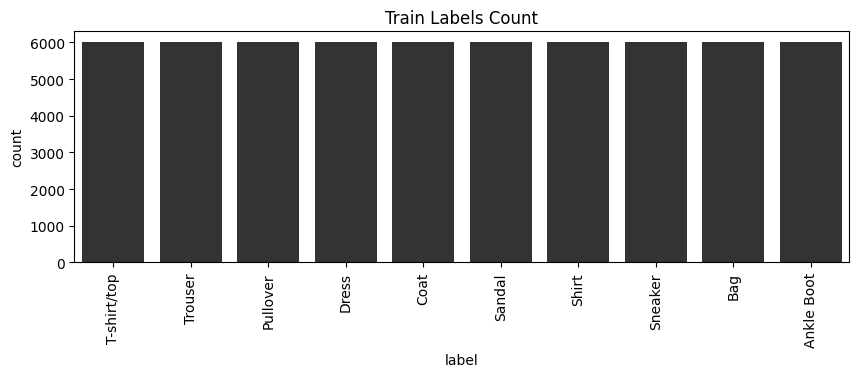

In [17]:
# Plot Label Per Class Method Implementation for Training Dataset
def plot_label_per_class(train):
    # Convert train to pandas dataframe
    train_df = pd.DataFrame(train)

    # Create plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=train_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Train Labels Count')

    plt.show()

# Visualize the class distribution in the training dataset
plot_label_per_class(train)

In [18]:
# Calculate the distribution of the classes in the testing dataset
get_classes_distribution(test)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


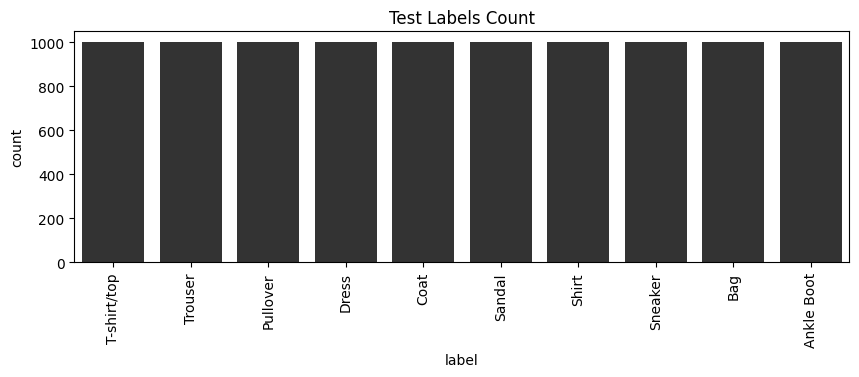

In [19]:
# Plot Label Per Class Method Implementation for Testing Dataset
def plot_label_per_class(test):
    # Convert test to pandas dataframe
    test_df = pd.DataFrame(test)

    # Create plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=test_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Test Labels Count')

    plt.show()

# Visualize the class distribution in the testing dataset
plot_label_per_class(test)

#### **Step 2: Preprocess the Data**
##### This data preprocessing step aims to prepare the Fashion MNIST dataset for training a neural network. The first step involves extracting the image data and their corresponding labels from the train and test datasets using pandas. After this, the images are reshaped into a 28x28 pixel format as they were originally flattened into a 1D array of 784 pixels.

Next, the pixel values are normalized to the range 0 to 1 by dividing each pixel value by 255. This rescales the pixel values to a range suitable for training a neural network. The rescaled pixel values help in making the model more robust and prevents overfitting.

Finally, the data is split into training and testing sets using an 80-20 split. The training set will be used to train the model while the test set will be used to evaluate the performance of the trained model.

In [20]:
# Rescaling image data
train_images = np.array(train.iloc[:, 1:])
train_labels = np.array(train.iloc[:, 0])
test_images = np.array(test.iloc[:, 1:])
test_labels = np.array(test.iloc[:, 0])

In [21]:
# Reshaping images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [22]:
# Fix data type and Normalizing images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255